# MACHINE LEARNING CAPSTONE PROJECT:  
### TOXIC COMMENT CLASSIFICATION 

1. Import necessary files 
2. Read the train.csv file 
3. List the various fields in our dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
print(df.shape)

(159571, 8)


In [3]:
df[df['toxic'] == 1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


So, a comment may have multiple tags corresponding to it, as this is a multi-lable classification problem.

In [4]:
# below line causes shuffling of indices, to avoid using train_test_split later
df = df.reindex(np.random.permutation(df.index))

# Separate the comment field data and outcome labels

In [5]:
comment = df['comment_text']
comment = comment.as_matrix()


/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [6]:
label = df[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
print(label.head())
label = label.as_matrix()

        toxic  severe_toxic  obscene  threat  insult  identity_hate
115830      0             0        0       0       0              0
156855      0             0        0       0       0              0
101977      0             0        0       0       0              0
109696      0             0        0       0       0              0
98303       0             0        0       0       0              0


/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### Let us find out the frequency of occurence of multilabelled data 
- ct1 counts samples having atleast one label
- ct2 counts samples having 2 or more than 2 labels

In [7]:
ct1,ct2 = 0,0
for i in range(label.shape[0]):
    ct = np.count_nonzero(label[i])
    if ct :
        ct1 = ct1+1
    if ct>1 :
        ct2 = ct2+1
print(ct1)
print(ct2)

16225
9865


## Data Visualisations
### Let us analyse the no. of comments having lengths varying from 0 to 1200

average length of comment: 394.073


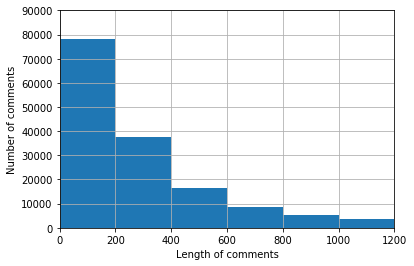

In [8]:
x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

### Remove excessive length comments
A threshold of 400 characters will be created and only comments which have length smaller than 400 will be used further.

In [9]:
comments = []
labels = []

for ix in range(comment.shape[0]):
    if len(comment[ix])<=400:
        comments.append(comment[ix])
        labels.append(label[ix])

In [10]:
labels = np.asarray(labels)

In [11]:
len(comments)

115910

Hence, after removing comments longer than 400 characters, we are still left with more than 115910 comments.

# Preprocessing 

## Removing Punctuations

In [12]:
import string
print(string.punctuation)
punctuation_edit = string.punctuation.replace('\'','') +"0123456789"
print (punctuation_edit)
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [13]:
from stop_words import get_stop_words
stop_words = get_stop_words('english')
stop_words.append('')

for x in range(ord('b'), ord('z')+1):
    stop_words.append(chr(x))    


In [18]:
import nltk
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer

In [19]:
#create objects of lemmatizer
stemmer = SnowballStemmer("english")
lemmatiser = WordNetLemmatizer() 
#download words from wordnet library
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/vinit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
for i in range(len(comments)):
    comments[i] = comments[i].lower().translate(trantab)
    l = []
    for word in comments[i].split():
        l.append(stemmer.stem(lemmatiser.lemmatize(word,pos="v")))
    comments[i] = " ".join(l)

## Applying Count Vectorizer
Here we can finally convert our comments into a matrix of token counts, which signifies the number of times it occurs.

In [264]:
# #import required library
# from sklearn.feature_extraction.text import CountVectorizer

# count_vector = CountVectorizer(stop_words=stop_words)
# tf = count_vector.fit_transform(comments).toarray()

Due to memory limitations we were not able to use countVectorizer, so we will continue with word2vec featurizing.

# Applying Avg Word2vec

In [21]:
# Training our own Word2Vec model using your own text corpus
i=0
list_of_sentance=[]
for sentance in comments:
    list_of_sentance.append(sentance.split())
    

In [23]:
# min_count = 5 considers only words that occured atleast 5 times

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
w2v_model=Word2Vec(list_of_sentance,min_count=5,size=100, workers=4)
print(w2v_model.wv.most_similar('great'))
print('='*50)
print(w2v_model.wv.most_similar('worst'))
  

[('nice', 0.7038792371749878), ('good', 0.618956983089447), ('excel', 0.5532981157302856), ('grate', 0.5256884098052979), ('fantast', 0.5112932920455933), ('appreci', 0.4944371283054352), ('brilliant', 0.493205726146698), ('happi', 0.48555895686149597), ('superb', 0.46868351101875305), ('barnstar', 0.46322354674339294)]
[('biggest', 0.6196507215499878), ('greatest', 0.6190955638885498), ('rate', 0.5704338550567627), ('oppress', 0.5482473969459534), ('lowest', 0.5346767902374268), ('behest', 0.5311105251312256), ('student', 0.5282691717147827), ('loss', 0.5272243022918701), ('level', 0.5204219818115234), ('tyranni', 0.5196218490600586)]


In [24]:
w2v_words = list(w2v_model.wv.vocab)

In [268]:
from tqdm import tqdm_notebook as tqdm
sent_vectors = [];  
for sent in tqdm(list_of_sentance): 
    sent_vec = np.zeros(100)  
    cnt_words =0;  
    for word in sent:  
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

115910
100


## Splitting dataset into training and testing

In [269]:
X = np.asarray(sent_vectors)

In [270]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, shuffle=False)

In [271]:
X_train.shape, y_train.shape

((92728, 100), (92728, 6))

## Models

In [186]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score

## Logistic Regression (SGD with log loss)

In [ ]:
alpha = [0.00002, 0.00003, 0.00004, 0.00009, 0.0001, 0.0003, 0.0005]
for i in tqdm(alpha):
    classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=i, penalty='l2'), n_jobs=-1)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print(i, metrics.accuracy_score(y_test,predictions))

In [ ]:
classiier = OneVsRestClassifier(SGDClassifierlassifier(loss='log', alpha=xx), n_jobs=-1)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [ ]:
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

## SVM Classifier (SGD with hinge loss)

In [207]:
alpha = [0.00002, 0.00003, 0.00004, 0.00009, 0.0001, 0.0003, 0.0005]
for i in tqdm(alpha):
    classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=i, penalty='l2'), n_jobs=-1)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print(i, metrics.accuracy_score(y_test,predictions))

2e-05 0.8767578293503581
3e-05 0.8918557501509792
4e-05 0.8922008454835648
9e-05 0.8956949357259943
0.0001 0.8948753343111034
0.0003 0.8939694590630661
0.0005 0.8944008282287982



In [ ]:
classiier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=xx), n_jobs=-1)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [204]:
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

accuracy : 0.8931929945647485
macro f1 score : 0.30286368897188304
micro f1 scoore : 0.5831967660876215
hamming loss : 0.027427889454461795
Precision recall report :
               precision    recall  f1-score   support

           0       0.82      0.54      0.65      2542
           1       0.00      0.00      0.00       256
           2       0.79      0.57      0.66      1405
           3       0.00      0.00      0.00        78
           4       0.76      0.38      0.50      1308
           5       0.00      0.00      0.00       218

   micro avg       0.80      0.46      0.58      5807
   macro avg       0.39      0.25      0.30      5807
weighted avg       0.72      0.46      0.56      5807
 samples avg       0.05      0.04      0.05      5807



/home/vinit/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/vinit/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/vinit/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/vinit/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


## Random Forest Classifier

In [208]:
from sklearn.ensemble import RandomForestClassifier

In [213]:
estimators = [17, 19, 21]
for i in tqdm(estimators):
    classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=i), n_jobs=-1)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print(i, metrics.accuracy_score(y_test,predictions))

17 0.8933655422310414
19 0.8923733931498576
21 0.8940125959796393



In [218]:
deapth = [1,3,5,7,9,11,13,15]
for i in tqdm(deapth):
    classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=21, max_depth = i), n_jobs=-1)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print(i, metrics.accuracy_score(y_test,predictions))

1 0.8852989388318523
3 0.8900439996549047
5 0.8925890777327237
7 0.893279268397895
9 0.894142006729359
11 0.8947027866448106
13 0.8934518160641878
15 0.8927184884824433


 So the best performance is from n_estimators = 21 and max_deapth = 11

In [221]:
classiier = OneVsRestClassifier(RandomForestClassifier(n_estimators=21, max_depth=11), n_jobs=-1)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [222]:
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))


accuracy : 0.8941851436459322
macro f1 score : 0.3532016889555217
micro f1 scoore : 0.5726979895590358
hamming loss : 0.02765795300951888
Precision recall report :
               precision    recall  f1-score   support

           0       0.83      0.51      0.63      2542
           1       0.44      0.14      0.21       256
           2       0.81      0.47      0.59      1405
           3       1.00      0.04      0.07        78
           4       0.78      0.44      0.57      1308
           5       0.56      0.02      0.04       218

   micro avg       0.81      0.44      0.57      5807
   macro avg       0.74      0.27      0.35      5807
weighted avg       0.79      0.44      0.56      5807
 samples avg       0.05      0.04      0.04      5807



/home/vinit/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/vinit/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


## XGBoost

In [272]:
import xgboost as xgb

In [273]:
classiier = OneVsRestClassifier(xgb, n_jobs=-1)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [274]:
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

accuracy : 0.8926322146492969
macro f1 score : 0.3376185230858673
micro f1 scoore : 0.5562024182713837
hamming loss : 0.028499122882696345
Precision recall report :
               precision    recall  f1-score   support

           0       0.86      0.48      0.62      2580
           1       0.45      0.11      0.17       292
           2       0.85      0.45      0.59      1449
           3       0.33      0.01      0.03        72
           4       0.78      0.42      0.55      1318
           5       0.69      0.04      0.07       228

   micro avg       0.83      0.42      0.56      5939
   macro avg       0.66      0.25      0.34      5939
weighted avg       0.81      0.42      0.54      5939
 samples avg       0.05      0.04      0.04      5939



/home/vinit/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/vinit/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


## Applying Neural Network Model

In [275]:
train_df = pd.read_csv("train.csv").fillna("sterby")
test_df = pd.read_csv("test.csv").fillna("sterby")

In [276]:
X_train = train_df["comment_text"].values
y_train = train_df[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
X_test = test_df["comment_text"].values

In [277]:
from keras.preprocessing import sequence
from keras.models import Model, Input
from keras.layers import Dense, Embedding, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam

In [278]:
max_features = 20000   
maxlen = 100  
batch_size = 64   
embedding_dims = 100  

In [279]:
tok = Tokenizer(num_words=max_features)
tok.fit_on_texts(list(X_train) + list(X_test))
x_train = tok.texts_to_sequences(X_train)
x_test = tok.texts_to_sequences(X_test)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Average train sequence length: {}'.format(np.mean(list(map(len, x_train)), dtype=int)))
print('Average test sequence length: {}'.format(np.mean(list(map(len, x_test)), dtype=int)))

159571 train sequences
153164 test sequences
Average train sequence length: 65
Average test sequence length: 57


In [280]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (159571, 100)
x_test shape: (153164, 100)


In [283]:
cmt_input = Input((maxlen,))
 
emb = Embedding(max_features, embedding_dims, input_length=maxlen, 
                        embeddings_initializer="uniform")(cmt_input)

GMP = GlobalMaxPooling1D()(emb)
dense = Dense(25, activation = 'relu')(GMP)
output = Dense(6, activation='sigmoid')(dense)

model = Model(inputs=cmt_input, outputs=output)

model.compile(loss='binary_crossentropy',
              optimizer=Adam(0.01),
              metrics=['accuracy'])

In [245]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=3, validation_split=0.1)

Train on 143613 samples, validate on 15958 samples
Epoch 1/3
143613/143613 [==============================] - 42s 290us/step - loss: 0.0942 - acc: 0.9708 - val_loss: 0.0585 - val_acc: 0.9801
Epoch 2/3
143613/143613 [==============================] - 38s 266us/step - loss: 0.0512 - acc: 0.9815 - val_loss: 0.0535 - val_acc: 0.9806
Epoch 3/3
143613/143613 [==============================] - 65s 454us/step - loss: 0.0460 - acc: 0.9827 - val_loss: 0.0551 - val_acc: 0.9799


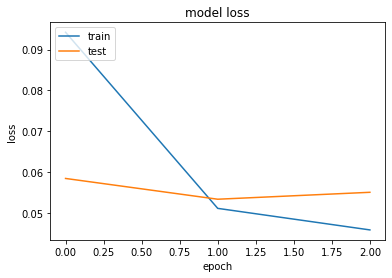

In [247]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

After evaluating from all different models, we found Neural network model as the best model.
So, we will be using neural network as our base model.

In [26]:
try:
    import dill as pickle
except ImportError:
    import pickle

In [27]:
with open('w2v_words.pkl', 'wb') as x:
    pickle.dump(w2v_words, x)

In [286]:
with open('model.pkl', 'wb') as modell:
    pickle.dump(model, modell)

In [ ]:
model.save()